# task4

C(x=0) = 1

dC/dt(x=-1) = 0

compute C with implicit scheme of 2nd order (something like crank-nicholson) and apply BCs

task: analyse accuracy + compare with task 3

In [61]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from task1_hickel import analytical_sol

In [66]:
def TDMAsolve(A, b):
    Ac = A.copy()
    bc = b.copy()
    n = A.shape[0]
    x = numpy.zeros(n)

    #eliminate lower diagonal
    for k in range(1, n):
        m = Ac[k,k-1]/Ac[k-1,k-1]
        Ac[k,k] = Ac[k,k] - m*Ac[k-1,k]
        bc[k] = bc[k] - m*bc[k-1]
        #Ac[k,k-1] = 0 #not necessary

    #reverse substitution
    x[n-1] = bc[n-1]/Ac[n-1,n-1]
    k=n-2
    for i in range(0, n-1):
        x[k] = (bc[k]-Ac[k,k+1]*x[k+1])/Ac[k,k]
        k=k-1

    return x


#fill discretisation matrix
def fill_matrix(matrix):
    for i in range(len(matrix[0])):
        matrix[i,i] = 1+2*S*D
    for i in range(len(matrix[0])-1):
        matrix[i+1,i] = -S*D
        matrix[i,i+1] = -S*D
    return matrix


#compute right-hand side (Crank Nicholson scheme)
def computeRHS(C_vector):
    B = numpy.zeros([len(C_vector),len(C_vector)])
    for i in range(len(B[0])):
        B[i,i] = 1-2*S*D
    for i in range(len(B[0])-1):
        B[i+1,i] = S*D
        B[i,i+1] = S*D
    return numpy.dot(B,C_vector)

#apply BC to concentration vector
def apply_BC(C_vector):
    C_vector[0] = dirichlet
    C_vector[-1] = C_vector[-2]

    #C_vector[0] = C_vector[0] + S*D*dirichlet
    #C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_0[-2])

    #C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_vector[-2])
    #C_vector[-1] = C_vector[-2] #+ S*D*C_vector[-2]
    
    return C_vector

[0.99240201 0.30590891 0.05938084 0.00912802 0.00886459]


In [69]:
#settings of time and space
xmax = 50
tmax = 500
dx = 1/xmax
dt = 60
D = 10**(-6)
dirichlet = 1 #at x=0
neuman = 0 #at x=h

#initialization
space = np.linspace(0,xmax,xmax)
time = np.linspace(0,tmax,tmax)
S = dt/(dx*dx)
C = [] #concentration values
A = numpy.zeros([xmax,xmax]) #discretisation matrix
C_0 = numpy.zeros([xmax]) #concentration vector at given time step

#solve
A = fill_matrix(A)
C_old = C_0
for i in range(tmax):
    C_old = apply_BC(C_old)
    C_new = TDMAsolve(A,C_old)
    #C_new = apply_BC(C_new)

    C.append(C_new)
    #C_old = computeRHS(C_new)
    C_old = C_new
    print(C_old)

C = np.array(C)

27969646e-04 3.89598004e-04 2.86443495e-04
 2.10335563e-04 1.54963759e-04 1.15531085e-04 8.84719198e-05
 7.12279404e-05 6.20756728e-05]
[8.61992711e-01 8.03936831e-01 7.46341188e-01 6.89603210e-01
 6.34102384e-01 5.80192635e-01 5.28195595e-01 4.78394967e-01
 4.31032134e-01 3.86303132e-01 3.44357017e-01 3.05295610e-01
 2.69174546e-01 2.36005512e-01 2.05759493e-01 1.78370854e-01
 1.53742042e-01 1.31748684e-01 1.12244884e-01 9.50685182e-02
 8.00463453e-02 6.69987957e-02 5.57443155e-02 4.61031839e-02
 3.79007505e-02 3.09700708e-02 2.51539438e-02 2.03063789e-02
 1.62935372e-02 1.29942035e-02 1.02998561e-02 8.11440240e-03
 6.35365209e-03 4.94459183e-03 3.82452467e-03 2.94012721e-03
 2.24647118e-03 1.70604708e-03 1.28781990e-03 9.66338645e-04
 7.20915287e-04 5.34882117e-04 3.94932083e-04 2.90542573e-04
 2.13480253e-04 1.57382531e-04 1.17409950e-04 8.99631364e-05
 7.24577662e-05 6.31512348e-05]
[8.62000652e-01 8.04005649e-01 7.46469436e-01 6.89788211e-01
 6.34340323e-01 5.80478692e-01 5.285241

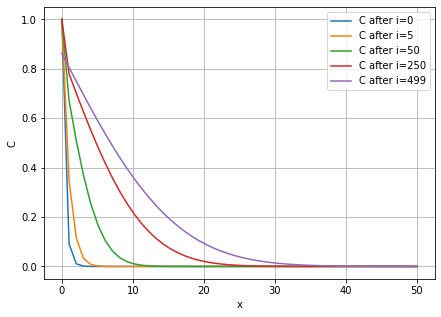

In [70]:
plottimesteps = [0,round((tmax-1)*0.01),round((tmax-1)*0.1),round((tmax-1)*0.5),tmax-1]
fig = plt.figure(figsize = (7,5))
for i in plottimesteps:
    #plt.plot(space,C[i,:],label="C")
    plt.plot(space,C[i,:],label="C after i="+str(i))
    
plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
plt.show()
#plt.savefig('plots/asdfasdfasdfasdf.pdf')

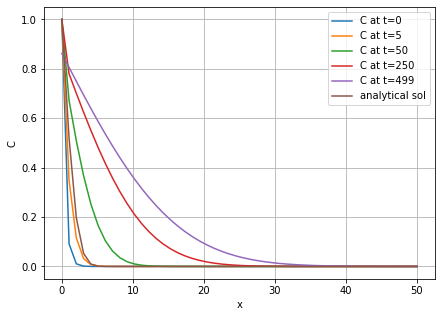

In [71]:
plottimesteps = [0,round((tmax-1)*0.01),round((tmax-1)*0.1),round((tmax-1)*0.5),tmax-1]
fig = plt.figure(figsize = (7,5))
for i in plottimesteps:
    #plt.plot(space,C[i,:],label="C")
    plt.plot(space,C[i,:],label="C at t="+str(i))
plt.plot(space,analytical_sol(tmax, points=xmax, n_max=100),label="analytical sol")

plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
plt.show()
#plt.savefig('plots/asdfasdfasdfasdf.pdf')